# Name: Sahil Karne
# PRN: 202201040086
# Roll no: 629
# Div: F
# Batch: F2
# Assignment 6 (Minor Project)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Query 1: Perform data computation to calculate the average CO2 emissions per capita for each year and visualize the trend over time.

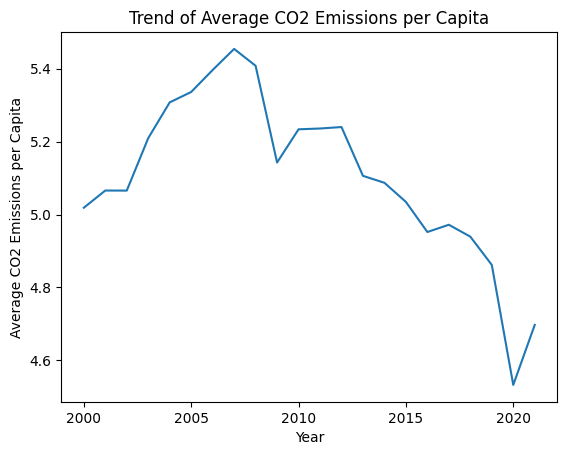

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FInal_Dataset_EDS_Project.csv")

# Calculate the average CO2 emissions per capita for each year
avg_co2_per_capita = df.groupby("year")["co2_per_capita"].mean()

# Visualize the trend over time
plt.plot(avg_co2_per_capita.index, avg_co2_per_capita.values)
plt.xlabel("Year")
plt.ylabel("Average CO2 Emissions per Capita")
plt.title("Trend of Average CO2 Emissions per Capita")
plt.show()


# Query 2: Manipulate the dataset to create a new column that categorizes countries into high, medium, and low CO2 emissions based on their CO2 per capita values. Visualize the distribution of countries across these categories.

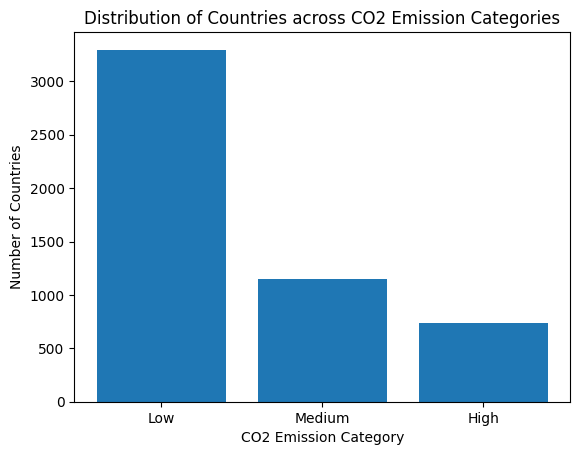

In [3]:
import numpy as np

# Define CO2 emission categories
bins = [0, 5, 10, np.inf]
labels = ["Low", "Medium", "High"]

# Create a new column categorizing countries based on CO2 per capita
df["co2_category"] = pd.cut(df["co2_per_capita"], bins=bins, labels=labels)

# Visualize the distribution of countries across categories
category_counts = df["co2_category"].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("CO2 Emission Category")
plt.ylabel("Number of Countries")
plt.title("Distribution of Countries across CO2 Emission Categories")
plt.show()

# Query 3: Implement a linear regression model to predict the GDP based on CO2 emissions. Evaluate the performance of the model using appropriate metrics (e.g., R-squared value) and visualize the regression line.

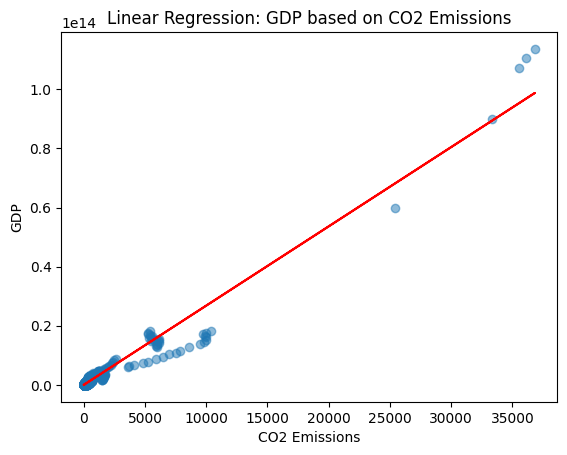

R-squared value: 0.9563788823500895


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# Remove rows with missing GDP values
df_cleaned = df.dropna(subset=["gdp"])

# Split the data into features (CO2 emissions) and target (GDP)
X = df_cleaned["co2"].values.reshape(-1, 1)
y = df_cleaned["gdp"]

# Impute missing values in X
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Create and fit the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_imputed, y)

# Make predictions
y_pred = reg_model.predict(X_imputed)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Visualize the regression line
plt.scatter(X_imputed, y, alpha=0.5)
plt.plot(X_imputed, y_pred, color="red")
plt.xlabel("CO2 Emissions")
plt.ylabel("GDP")
plt.title("Linear Regression: GDP based on CO2 Emissions")
plt.show()

print("R-squared value:", r2)


# Query 4: Use data manipulation to calculate the percentage change in CO2 emissions for each country over consecutive years. Identify the top three countries with the highest and lowest percentage change and visualize their CO2 emission trends.

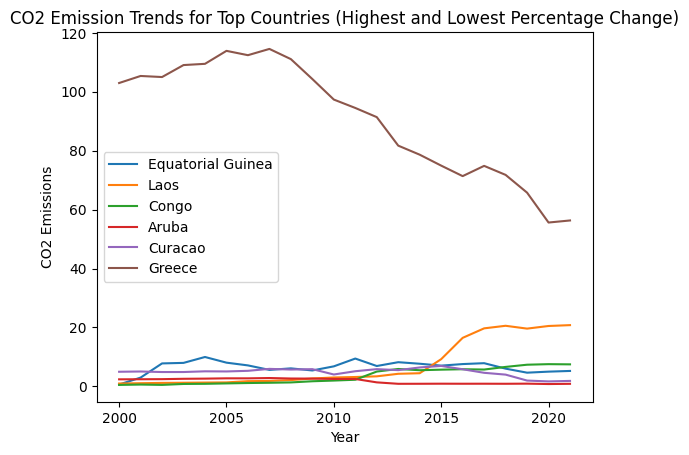

In [5]:
# Calculate the percentage change in CO2 emissions for each country
df["co2_change_percentage"] = df.groupby("country")["co2"].pct_change() * 100

# Identify the top three countries with the highest percentage change
top_countries_highest = df.groupby("country")["co2_change_percentage"].mean().nlargest(3)

# Identify the top three countries with the lowest percentage change
top_countries_lowest = df.groupby("country")["co2_change_percentage"].mean().nsmallest(3)

# Visualize the CO2 emission trends for the top countries
for country in top_countries_highest.index:
    country_data = df[df["country"] == country]
    plt.plot(country_data["year"], country_data["co2"], label=country)

for country in top_countries_lowest.index:
    country_data = df[df["country"] == country]
    plt.plot(country_data["year"], country_data["co2"], label=country)

plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Emission Trends for Top Countries (Highest and Lowest Percentage Change)")
plt.legend()
plt.show()


# Query 5: Apply K-means clustering to group countries based on their population, GDP, and CO2 emissions. Visualize the clusters using a scatter plot and evaluate the clustering performance using metrics like silhouette score or inertia.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


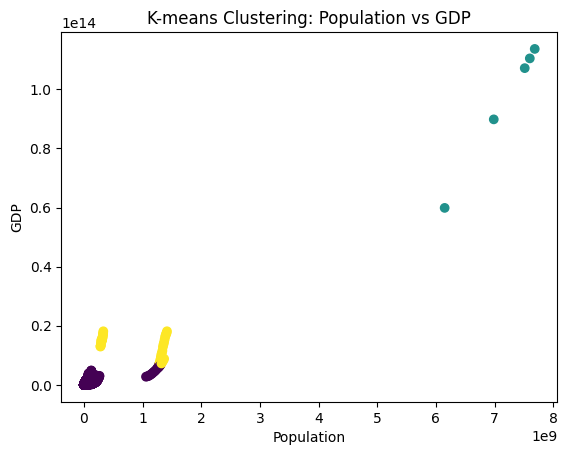

In [6]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Select features for clustering
features = ["population", "gdp", "co2"]

# Drop rows with missing values in the selected features
df_cleaned = df.dropna(subset=features)

# Extract the feature values
X = df_cleaned[features].values

# Impute missing values in X
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Perform K-means clustering
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_imputed)

# Visualize the clusters
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=labels)
plt.xlabel("Population")
plt.ylabel("GDP")
plt.title("K-means Clustering: Population vs GDP")
plt.show()


# Query 6: Compute the correlation between temperature change from CO2 emissions and land-use change CO2. Visualize the relationship using a scatter plot and calculate the correlation coefficient.

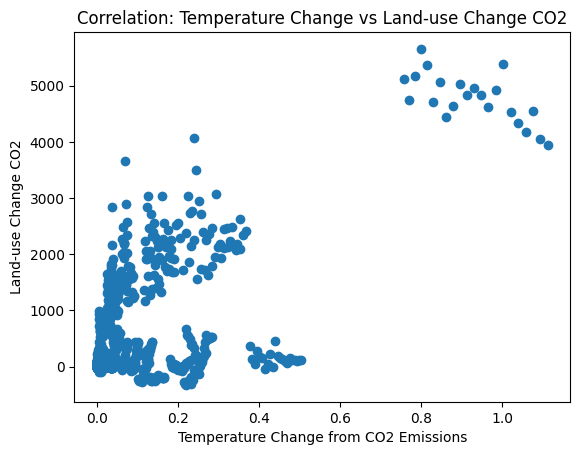

Correlation coefficient: 0.7276753991727413


In [7]:
# Compute the correlation between temperature change and land-use change CO2
correlation = df["temperature_change_from_co2"].corr(df["land_use_change_co2"])

# Visualize the relationship using a scatter plot
plt.scatter(df["temperature_change_from_co2"], df["land_use_change_co2"])
plt.xlabel("Temperature Change from CO2 Emissions")
plt.ylabel("Land-use Change CO2")
plt.title("Correlation: Temperature Change vs Land-use Change CO2")
plt.show()

print("Correlation coefficient:", correlation)


# Query 7: Implement KNN classification to predict whether a country has high or low CO2 emissions based on its population and GDP. Evaluate the classification model's performance using metrics like accuracy, precision, and recall.

Accuracy: 0.584241408214585
Precision: 0.5677276496787281
Recall: 0.584241408214585
Confusion Matrix:
[[ 25  14 110   3]
 [ 15 527  61  48]
 [ 14 112  95  22]
 [  6  72  19  50]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.42      0.16      0.24       152
           0       0.73      0.81      0.77       651
           1       0.33      0.39      0.36       243
           2       0.41      0.34      0.37       147

    accuracy                           0.58      1193
   macro avg       0.47      0.43      0.43      1193
weighted avg       0.57      0.58      0.57      1193



Text(0.5, 1.0, 'Predicted CO2 Category Distribution')

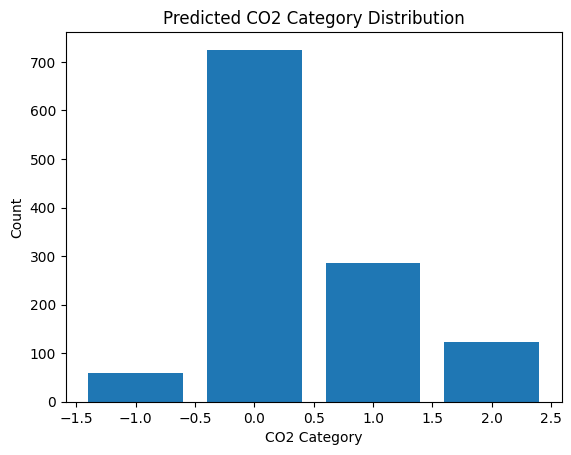

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Select features for classification
features = ["population", "gdp"]

# Filter the dataset to include only the necessary columns
df_filtered = df[["country", "co2_category"] + features].copy()

# Identify numerical columns
numerical_columns = ["population", "gdp"]

# Convert categorical columns to numeric
for col in df_filtered.columns:
    if df_filtered[col].dtype.name == "category":
        df_filtered[col] = df_filtered[col].cat.codes

# Impute missing values with mean for numerical columns
imputer = SimpleImputer(strategy="mean")
df_filtered[numerical_columns] = imputer.fit_transform(df_filtered[numerical_columns])

# Replace NaN values with 0
df_filtered.fillna(0, inplace=True)

# Separate the features and target variable
X = df_filtered[features].values
y = df_filtered["co2_category"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

# Plot the distribution of predicted classes
class_names = knn.classes_
predicted_counts = pd.Series(y_pred).value_counts().sort_index()
plt.bar(class_names, predicted_counts)
plt.xlabel("CO2 Category")
plt.ylabel("Count")
plt.title("Predicted CO2 Category Distribution")


# Query 8: Compute the average temperature change from CO2 emissions for each country and visualize the countries with the highest and lowest temperature changes.

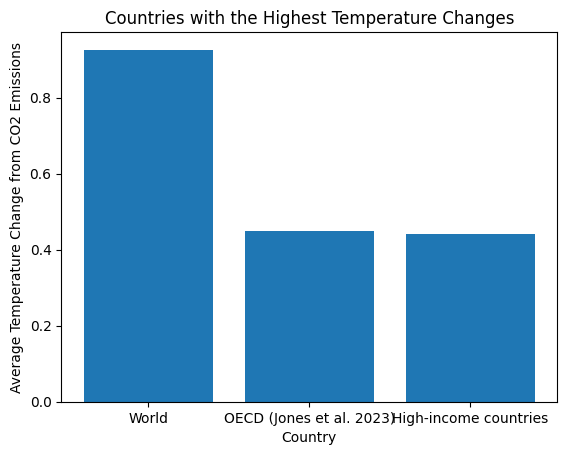

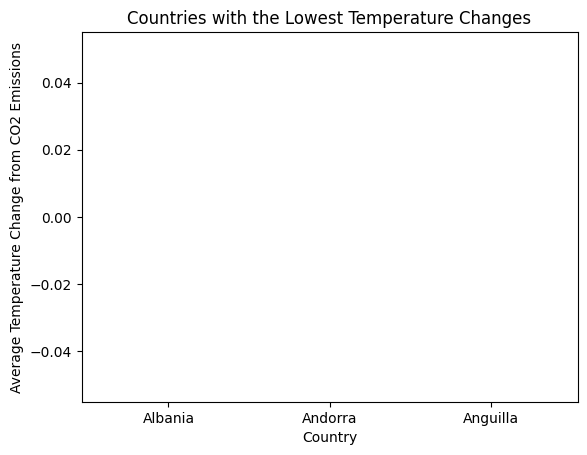

In [9]:
# Calculate the average temperature change from CO2 emissions for each country
avg_temp_change = df.groupby("country")["temperature_change_from_co2"].mean()

# Visualize the countries with the highest and lowest temperature changes
top_countries_highest = avg_temp_change.nlargest(3)
top_countries_lowest = avg_temp_change.nsmallest(3)

# Plot the countries with the highest temperature changes
plt.bar(top_countries_highest.index, top_countries_highest.values)
plt.xlabel("Country")
plt.ylabel("Average Temperature Change from CO2 Emissions")
plt.title("Countries with the Highest Temperature Changes")
plt.show()

# Plot the countries with the lowest temperature changes
plt.bar(top_countries_lowest.index, top_countries_lowest.values)
plt.xlabel("Country")
plt.ylabel("Average Temperature Change from CO2 Emissions")
plt.title("Countries with the Lowest Temperature Changes")
plt.show()


# Query 9: Manipulate the dataset to create a new column that represents the per capita CO2 emissions as a percentage of the global CO2 emissions. Visualize the distribution of countries across different emission percentage ranges.

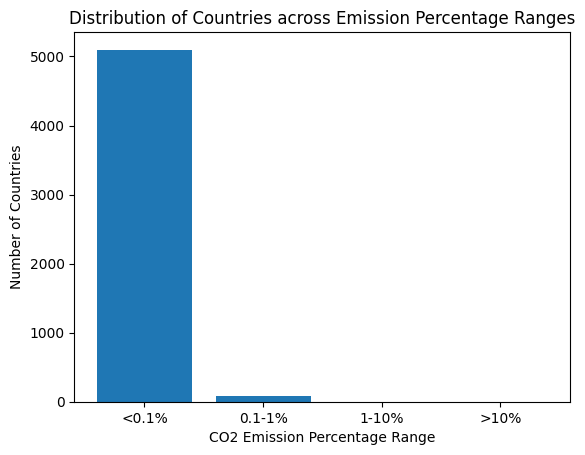

In [10]:
# Calculate the percentage of per capita CO2 emissions relative to global CO2 emissions
df["co2_percentage"] = (df["co2_per_capita"] / df["co2_per_capita"].sum()) * 100

# Visualize the distribution of countries across emission percentage ranges
bins = [0, 0.1, 1, 10, 100]
labels = ["<0.1%", "0.1-1%", "1-10%", ">10%"]

df["co2_percentage_range"] = pd.cut(df["co2_percentage"], bins=bins, labels=labels)

range_counts = df["co2_percentage_range"].value_counts()

plt.bar(range_counts.index, range_counts.values)
plt.xlabel("CO2 Emission Percentage Range")
plt.ylabel("Number of Countries")
plt.title("Distribution of Countries across Emission Percentage Ranges")
plt.show()


# Query 10: Apply K-means clustering to identify groups of countries with similar patterns of temperature change and land-use change CO2. Visualize the clusters using a scatter plot and interpret the results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


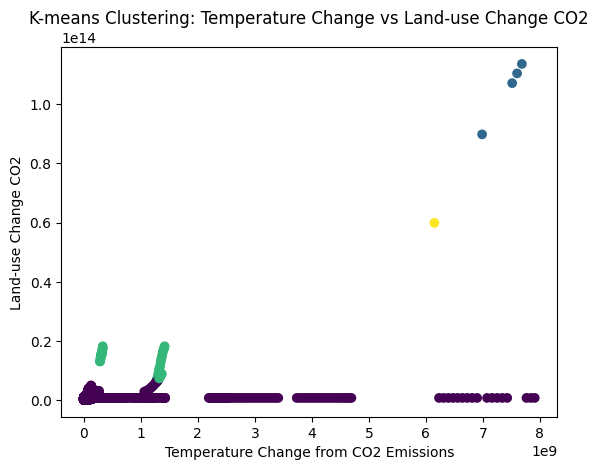

In [11]:
from sklearn.impute import SimpleImputer

# Select features for clustering
features = ["temperature_change_from_co2", "land_use_change_co2"]

# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Perform K-means clustering
k = 4  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_imputed)

# Visualize the clusters
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=labels)
plt.xlabel("Temperature Change from CO2 Emissions")
plt.ylabel("Land-use Change CO2")
plt.title("K-means Clustering: Temperature Change vs Land-use Change CO2")
plt.show()
